robust/images/estimated_op1_n.pdf


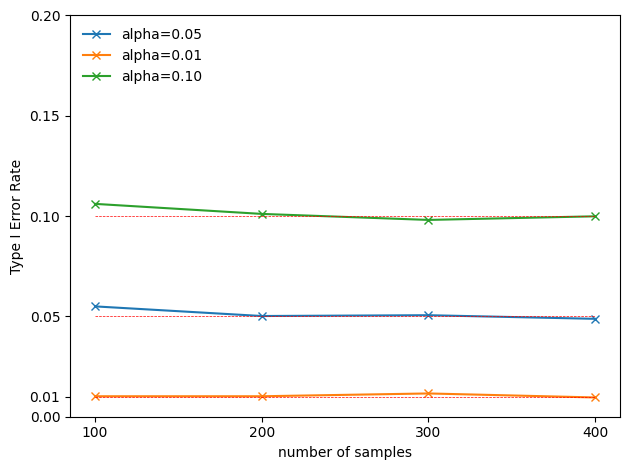

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

option = "op1"
keys= [10, 20, 30, 40]
keys = [100, 200, 300, 400]
n, p = 200, 20
fpr005_list =[]
fpr001_list =[]
fpr010_list =[]

for key in keys:
    if key >= 100:
        n = key
        label = 'number of samples'
        change = "n"
    else:
        p = key
        label = 'number of features'
        change = "p"

    results = []
    for seed in range(num_seeds := 10):
        with open(f"robust/results_estimated/{option}_{n}_{p}_{seed}.pkl", 'rb') as f:
            results += pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    fpr005_list.append(np.mean(p_list < 0.05))
    fpr001_list.append(np.mean(p_list < 0.01))
    fpr010_list.append(np.mean(p_list < 0.10))

plt.figure()
plt.plot(keys, fpr005_list, label="alpha=0.05", marker="x")
plt.plot(keys, fpr001_list, label="alpha=0.01", marker="x")
plt.plot(keys, fpr010_list, label="alpha=0.10", marker="x")
plt.plot(keys, [0.05]*len(keys), linestyle="--", color="red", lw=0.5)
plt.plot(keys, [0.01]*len(keys), linestyle="--", color="red", lw=0.5)
plt.plot(keys, [0.10]*len(keys), linestyle="--", color="red", lw=0.5)
plt.yticks([0.0, 0.01, 0.05, 0.10, 0.15, 0.20])
plt.xlabel(label)
plt.xticks(keys)
plt.ylabel("Type I Error Rate")
plt.ylim(0.0, 0.2)
plt.legend(frameon=False, loc="upper left")

file_name = f"robust/images/estimated_{option}_{change}.pdf"
print(file_name)
# plt.savefig(file_name, transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()


robust/images/robust_op2_0.01.pdf


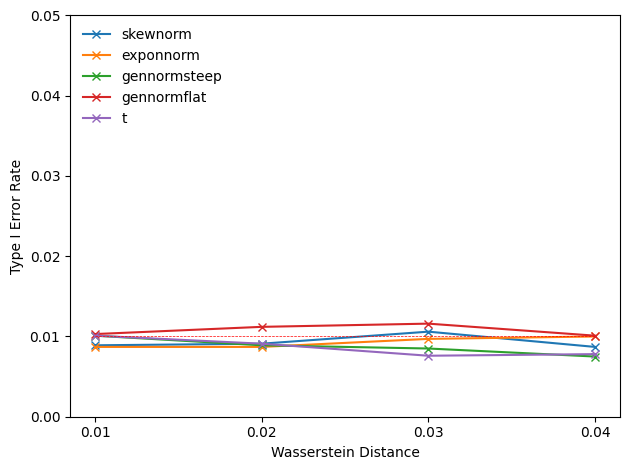

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

option = "op2"
alpha = 0.01
n, p = 200, 20
fpr_dict ={}
noise_list = ['skewnorm', 'exponnorm', 'gennormsteep', 'gennormflat', 't']
distance_list = [0.01, 0.02, 0.03, 0.04]

for noise in noise_list:
    fpr_dict[noise] = []
    for distance in distance_list:
        results = []
        for seed in range(num_seeds := 10):
            with open(f"robust/results_nongauss/{option}_{noise}_{distance}_{seed}.pkl", 'rb') as f:
                results += pickle.load(f)
        p_list = np.array([result.p_value for result in results])
        fpr_dict[noise].append(np.mean(p_list < alpha))

plt.figure()
for noise in noise_list:
    plt.plot(distance_list, fpr_dict[noise], label=noise, marker="x")
plt.plot(distance_list, [alpha]*4, linestyle="--", color="red", lw=0.5)
if alpha == 0.05:
    plt.yticks([0.0, 0.05, 0.10, 0.15, 0.20])
    plt.ylim(0.0, 0.2)
elif alpha == 0.01:
    plt.yticks([0.0, 0.01, 0.02, 0.03, 0.04, 0.05])
    plt.ylim(0.0, 0.05)
plt.xlabel("Wasserstein Distance")
plt.xticks(distance_list)
plt.ylabel("Type I Error Rate")
plt.legend(frameon=False, loc="upper left")

file_name = f"robust/images/robust_{option}_{alpha}.pdf"
print(file_name)
# plt.savefig(file_name, transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()